#Acme-Co-Employee-Attrition-Analysis-and-Prediction

# ( Yashav Shukla )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

plt.style.use("default")
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
pd.set_option('display.max_columns', 100)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## 1. Exploratory Data Analysis

### 1.1. Descriptive Statistics

In [3]:
numerical   = df.select_dtypes(exclude = 'object')
categorical = df.select_dtypes(include = 'object')

In [ ]:
numerical.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
numerical.nunique()

Age                           43
DailyRate                    886
DistanceFromHome              29
Education                      5
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobSatisfaction                4
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

In [5]:
categorical.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


#### Observations:
A. All data types **are appropriate**.<br>
B. **There are no** columns that have empty values.<br>
C. Based on the descriptive statistics above, it can be concluded that: <ul>
   <li>Numerical columns such as `DistanceFromHome`, `MonthlyIncome`, `NumCompaniesWorked`, `PercentSalaryHike`, `TotalWorkingYears`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, and `YearsWithCurrManager` seem to have distributions **skewed to the right **, if seen from the mean value which is much greater than the median value.
   <li>In the `DailyRate`, `EmployeeNumber`, `MonthlyIncome`, `MonthlyRate`, `TotalWorkingYears`, `YearsAtCompany` columns there are indications of **outliers** as shown by the **max values** which are very different when compared with other values.</li>
   <li>The `EmployeeCount`, `StandardHours`, `Over18` columns need to be *dropped*, because they only have **1 unique value**. Meanwhile, the `EmployeeNumber` column also needs to be *dropped*, because it has unique values whose number is **the same as the number of rows** that exist.</li>
   </ul>

### 1.2. Univariate Analysis

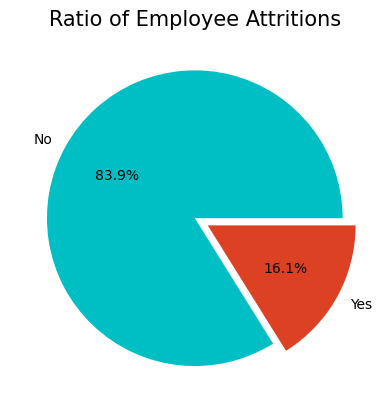

In [6]:
plt.pie(x = df['Attrition'].value_counts(), labels = ['No', 'Yes'], autopct = '%.1f%%',
        colors = ['#00bfc4', '#dd4124'], explode = [0, 0.1])


plt.title('Ratio of Employee Attritions', fontsize = 15)
plt.show()

Based on the illustration above, it can be concluded that **16.1%** of the total employees chose to **leave** the company while **83.9%** of the total employees chose to **remain**.

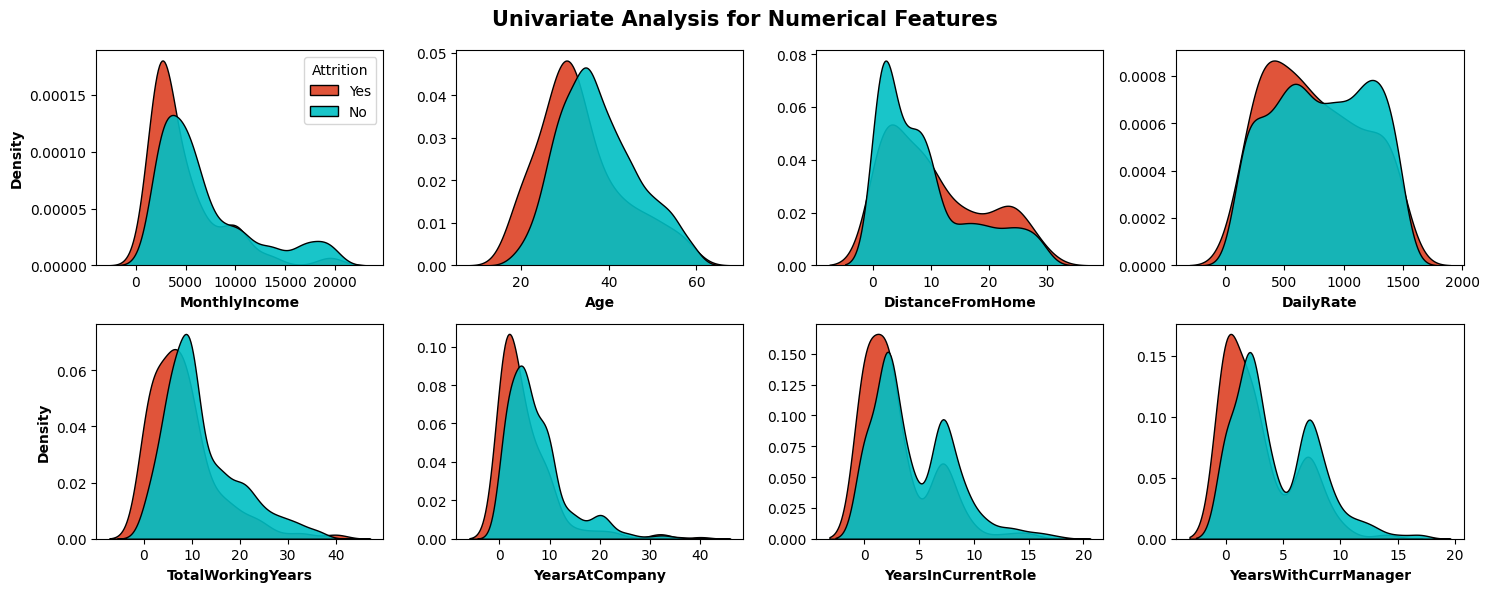

In [7]:

num_columns =  ['MonthlyIncome', 'Age', 'DistanceFromHome', 'DailyRate', 'TotalWorkingYears',
                'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']

fig, ax = plt.subplots(2, 4, figsize = (15,6))


for i, col in enumerate(num_columns):
  ax1 = sns.kdeplot(x = df[df['Attrition'] == 'Yes'][col], fill = True, label = 'Yes', color = '#dd4124', edgecolor = 'black', linewidth = 1, alpha = 0.9, ax = ax[i//4, i%4])
  ax2 = sns.kdeplot(x = df[df['Attrition'] == 'No'][col], fill = True, label = 'No', color = '#00bfc4', edgecolor = 'black', linewidth = 1, alpha = 0.9, ax = ax[i//4, i%4])

  ax1.set_xlabel(col, fontweight = 'bold')


  if i in [0, 4]:
    ax1.set_ylabel('Density', fontweight = 'bold')
  else:
    ax1.set_ylabel('')

  if i == 0:
    ax1.legend(title = 'Attrition')




plt.suptitle('Univariate Analysis for Numerical Features', fontsize = 15, fontweight = 'bold')


plt.tight_layout()
plt.show()

#### Observations:
- Employees with a Monthly Income of around 1800 - 3200 are the type of employee who has the highest Attrition Rate. Then employees with a Monthly Income of around 13,000 - 19,000 are the type of employee who has the lowest Attrition Rate.
- Employees under 40 years of age tend to have a higher *Attrition Rate*. Then, employees with an age range of around 25 - 35 years have the highest *Attrition rate*.
- Employees with a `Distance From Home` value of more than 10 km tend to have a higher *Attrition Rate*.
- Employees with a `Daily Rate` value of less than 800 tend to have a higher *Attrition Rate*.
- Employees with a `Total Working Years' value of around 0 - 2 years and 4.5 - 6 years are the two types of employees who have the highest *Attrition Rate*.
- Employees with a value of `Years at Company`, `Years in Current`, and `Years with Current Manager` around 0 - 1 year are the type of employee who has the highest *Attrition Rate*.

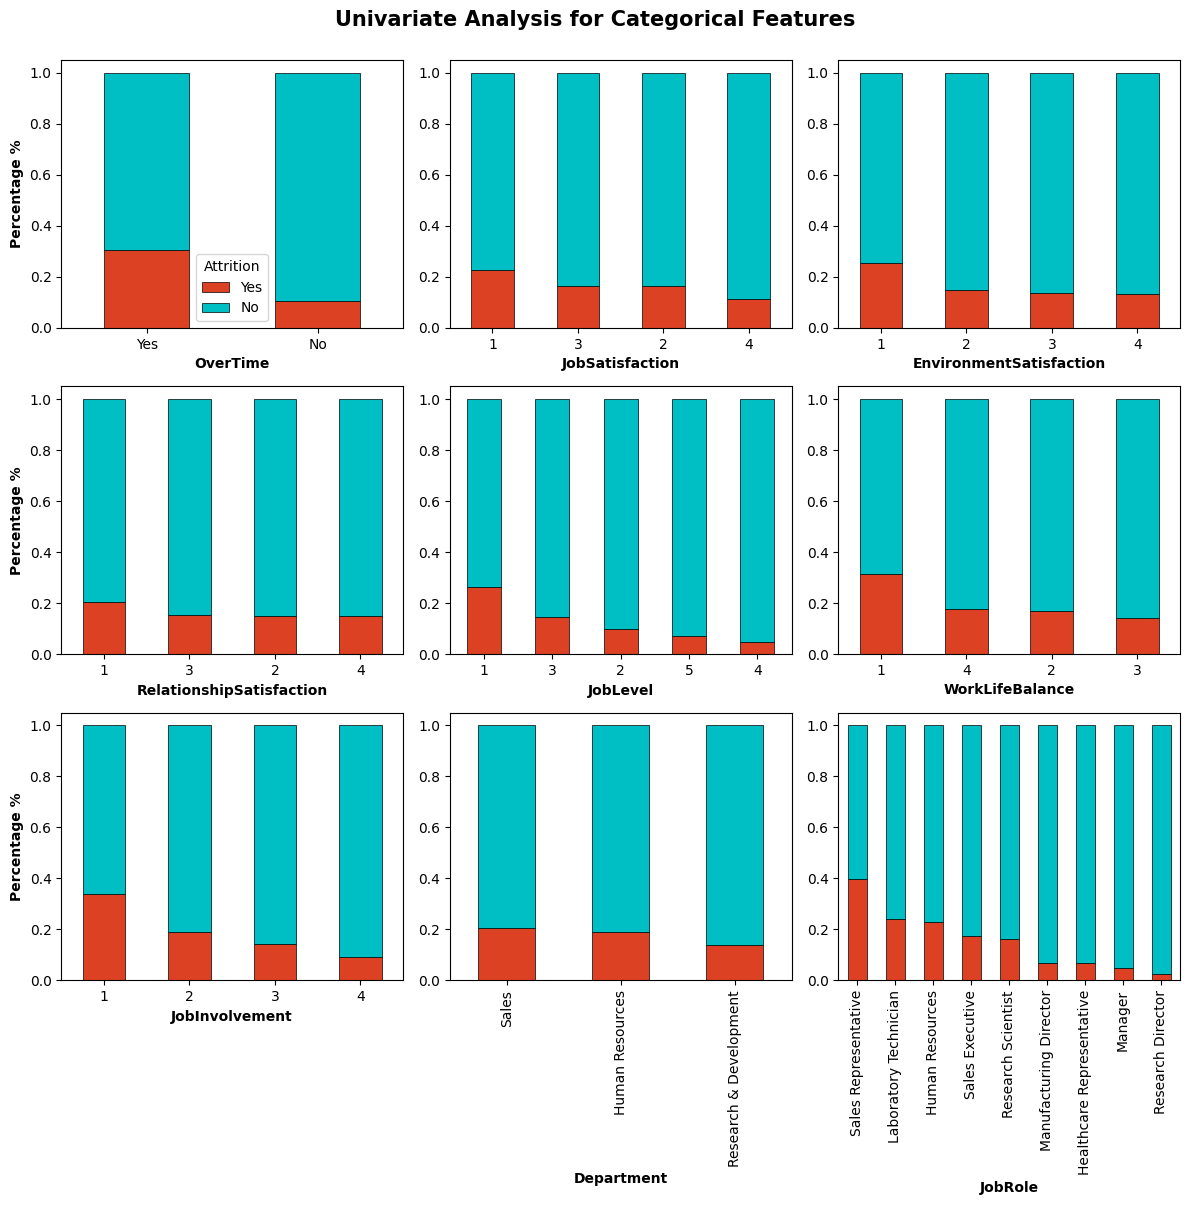

In [8]:

cat_columns = ['OverTime', 'JobSatisfaction','EnvironmentSatisfaction', 'RelationshipSatisfaction',
               'JobLevel', 'WorkLifeBalance', 'JobInvolvement', 'Department', 'JobRole']

fig, ax = plt.subplots(3,3, figsize = (12, 12))


for i, col in enumerate(cat_columns):
  df_cat = df.groupby(cat_columns[i])['Attrition'].value_counts(normalize = True).unstack()
  df_cat = df_cat[['Yes', 'No']]
  df_cat = df_cat.sort_values('Yes', ascending = False)


  ax1 = df_cat.plot.bar(stacked=True, color=['#dd4124', '#00bfc4'], edgecolor = 'black', linewidth = 0.5, ax = ax[i//3, i%3])


  ax1.set_xlabel(col, fontweight = 'bold')


  if i in [0,3,6]:
    ax1.set_ylabel('Percentage %', fontweight = 'bold')

  if i in [7,8]:
    ax1.set_xticklabels(df_cat.index, rotation = 90)
  else:
    ax1.set_xticklabels(df_cat.index, rotation = 0)

  if i != 0:
    ax1.get_legend().remove()


plt.suptitle('Univariate Analysis for Categorical Features', fontsize = 15, fontweight = 'bold', y = 1)

plt.tight_layout()
plt.show()

#### Observations:
- Employees who work beyond regular working hours (`over time`) have a higher *Attrition Rate* compared to employees who do not work overtime.
- Employees who have lower levels of `Job Satisfaction`, `Environment Satisfaction`, `Relationship Satisfaction`, `JobLevel`, `Work Life Balance`, and `JobInvolvement` tend to have a higher *Attrition Rate* and a value of 1 is the type of employee that has the highest *Attrition Rate*.
- Employees who work in the Sales Department have the highest Attrition Rate compared to other departments.
- Employees who serve as `Sales Representative`, `Laboratory Technician`, and `Human Resources` are the 3 types of employees who have the highest *Attrition rate*.

### 1.3. Bivariate Analysis

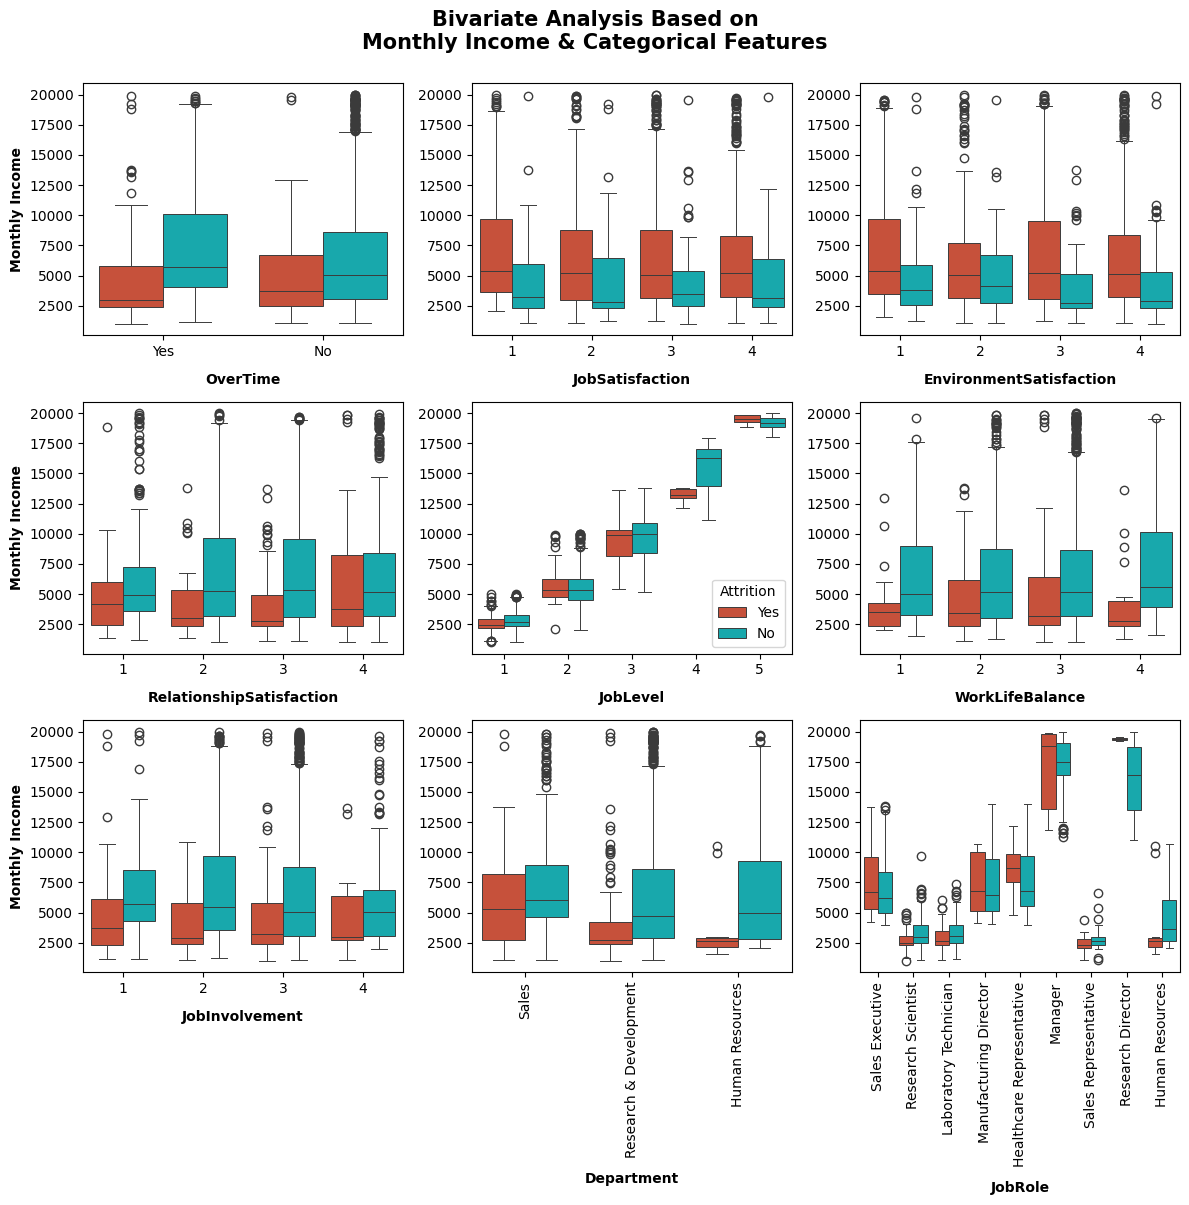

In [9]:

plt.figure(figsize=(12, 12))


palette = ['#dd4124', '#00bfc4']

for i in range(9):
    plt.subplot(3, 3, i+1)
    ax1 = sns.boxplot(x = cat_columns[i], y = "MonthlyIncome", data = df, hue = 'Attrition', palette = palette, linewidth = 0.7)

    ax1.set_xlabel(cat_columns[i], fontsize = 10, fontweight = 'bold', labelpad = 10)

    if i in [0, 3, 6]:
      ax1.set_ylabel('Monthly Income', fontsize = 10, fontweight = 'bold')
    else:
      ax1.set_ylabel('')


    if i in [7, 8]:
      ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)


    if i == 4:
      ax1.legend(title='Attrition', loc='lower right')
    else:
      ax1.get_legend().remove()


plt.suptitle('Bivariate Analysis Based on\nMonthly Income & Categorical Features', fontweight='bold', fontsize=15, y=1)


plt.tight_layout()
plt.show()

From the graph above which shows the relationship of `MonthlyIncome` with other features (`OverTime`, `JobSatisfaction`, `EnvironmentSatisfaction`, `RelationshipSatisfaction`, `JobLevel`, `WorkLifeBalance`, `JobInvolvement`, `Department`, `JobRole`) It can be concluded that employees with **lower monthly income** tend to have a higher Attrition Rate or a greater tendency to leave the company.

## 2. Data Preprocessing

### 2.1. Handle Missing Value

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
print("The number of empty values in each column:")
df.isna().sum()

The number of empty values in each column:


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Based on the information above, it is found that **there are no missing values** in all existing columns so there is no need for the process of deleting *missing values*.

### 2.2. Handle Duplicated Data

In [12]:

print(" Number of duplicate data :")
df.duplicated().sum()

 Number of duplicate data :


0

Based on the information above, it is found that **there is no duplicate data** so there is no need for a *duplicated data* deletion process.

### 2.3. Handle Outliers

In [13]:

from scipy import stats

print(f'Number of rows before removing outliers : {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
df = df[filtered_entries]

print(f' Number of rows after removing outliers: {len(df)}')

Number of rows before removing outliers : 1470
 Number of rows after removing outliers: 1387


- The process of deleting outliers data was carried out in the `MonthlyIncome`, `NumCompaniesWorked`, `TotalWorkingYears`, `TrainingTimesLastYear`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, and `YearsWithCurrManager` columns.<br>
- Based on the information above, it was found that before deleting *outliers* data there were **1470** rows of data and after deleting *outliers* data there were **1387** rows of data.

### 2.4. Feature Encoding

In [14]:

BusinessTravel_map = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}


df['Attrition'] = LabelEncoder().fit_transform(df['Attrition'])
df['BusinessTravel'] = df['BusinessTravel'].map(BusinessTravel_map)
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['OverTime'] = LabelEncoder().fit_transform(df['OverTime'])


df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0


In [15]:

for cat in categorical:
  if cat not in ['Attrition', 'BusinessTravel', 'Gender', 'OverTime', 'Over18']:
    df1 = pd.get_dummies(df[cat], prefix=cat)
    df  = df.drop(cat, axis = 1)
    df  = df.join(df1)

df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,49,0,2,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,37,1,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1387 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                1387 non-null   int64 
 1   Attrition                          1387 non-null   int64 
 2   BusinessTravel                     1387 non-null   int64 
 3   DailyRate                          1387 non-null   int64 
 4   DistanceFromHome                   1387 non-null   int64 
 5   Education                          1387 non-null   int64 
 6   EmployeeCount                      1387 non-null   int64 
 7   EmployeeNumber                     1387 non-null   int64 
 8   EnvironmentSatisfaction            1387 non-null   int64 
 9   Gender                             1387 non-null   int64 
 10  HourlyRate                         1387 non-null   int64 
 11  JobInvolvement                     1387 non-null   int64 
 12  JobLevel   

### 2.5. Feature Selection

In [17]:
df_new = df.drop(columns = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1387 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1387 non-null   int64
 1   Attrition                          1387 non-null   int64
 2   BusinessTravel                     1387 non-null   int64
 3   DailyRate                          1387 non-null   int64
 4   DistanceFromHome                   1387 non-null   int64
 5   Education                          1387 non-null   int64
 6   EnvironmentSatisfaction            1387 non-null   int64
 7   Gender                             1387 non-null   int64
 8   HourlyRate                         1387 non-null   int64
 9   JobInvolvement                     1387 non-null   int64
 10  JobLevel                           1387 non-null   int64
 11  JobSatisfaction                    1387 non-null   int64
 12  MonthlyIncome            

In [18]:

target_column = 'Attrition'

correlation_with_target = df_new.corr()[target_column].drop(target_column)

threshold = 0.05
columns_to_drop = correlation_with_target[abs(correlation_with_target) < threshold].index
data_filtered = df_new.drop(columns=columns_to_drop)

In [ ]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1387 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1387 non-null   int64
 1   Attrition                          1387 non-null   int64
 2   BusinessTravel                     1387 non-null   int64
 3   DailyRate                          1387 non-null   int64
 4   DistanceFromHome                   1387 non-null   int64
 5   EnvironmentSatisfaction            1387 non-null   int64
 6   JobInvolvement                     1387 non-null   int64
 7   JobLevel                           1387 non-null   int64
 8   JobSatisfaction                    1387 non-null   int64
 9   MonthlyIncome                      1387 non-null   int64
 10  NumCompaniesWorked                 1387 non-null   int64
 11  OverTime                           1387 non-null   int64
 12  RelationshipSatisfaction 

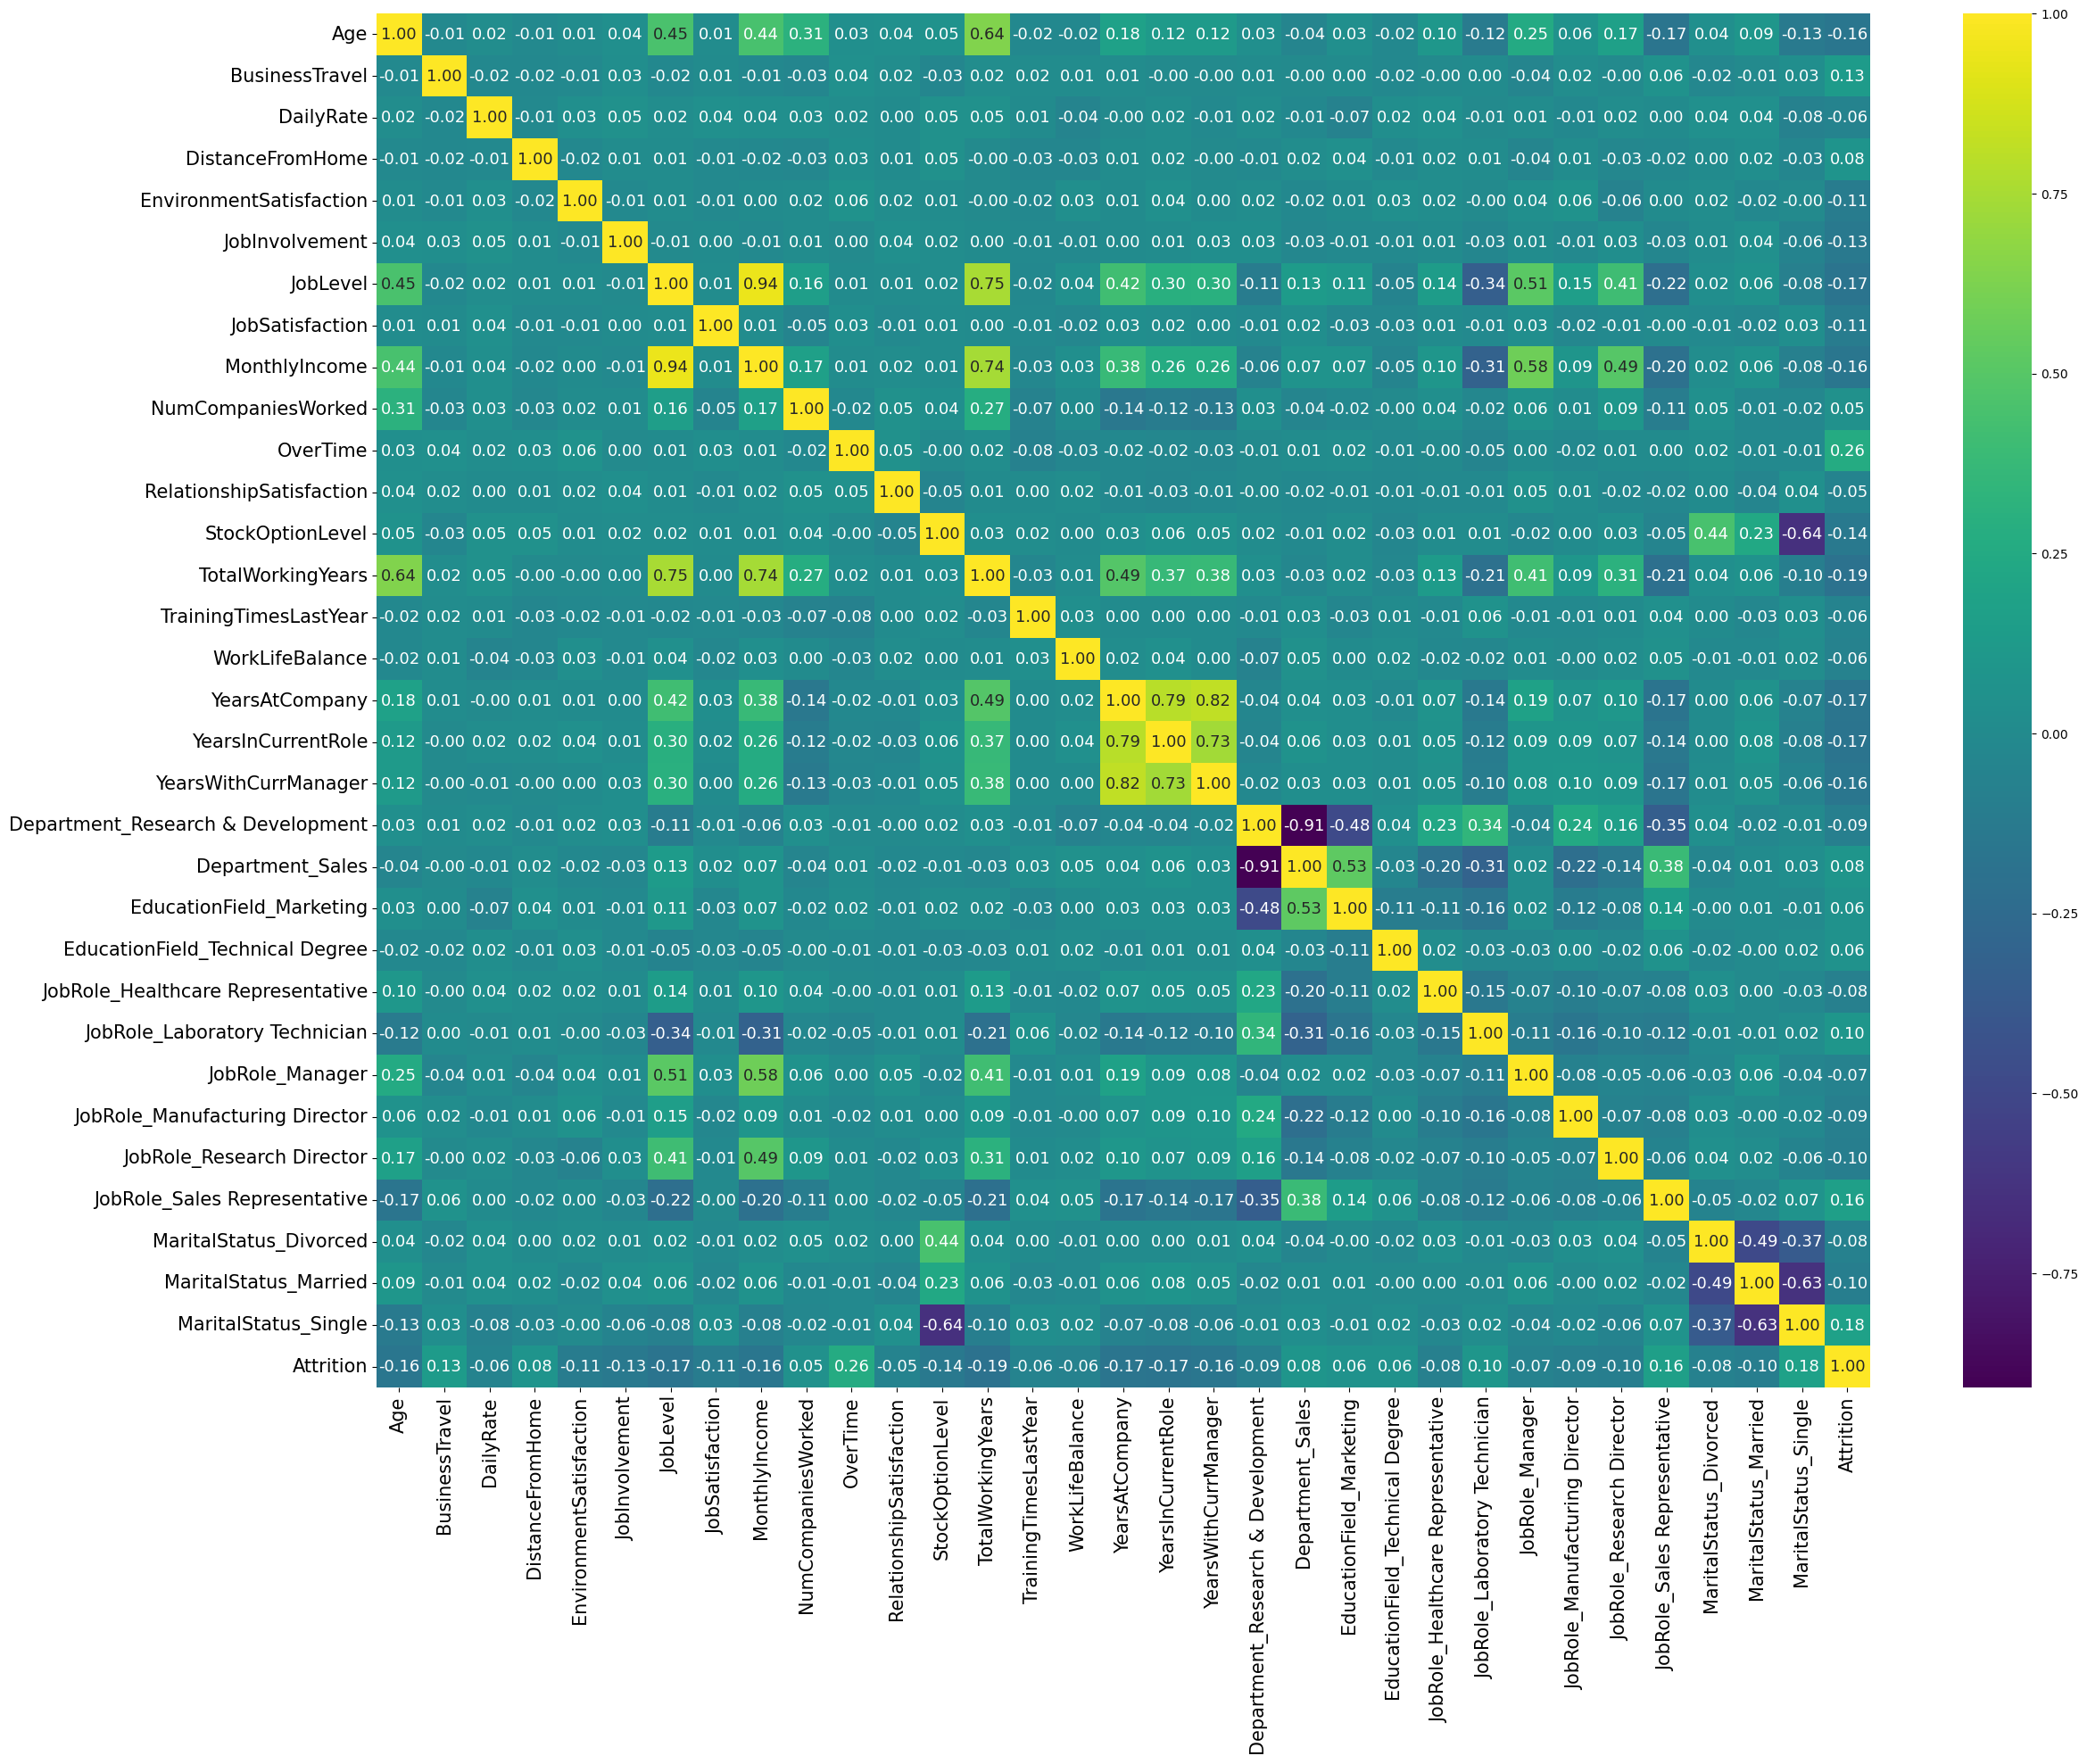

In [19]:
data_filtered = data_filtered.drop('Attrition', axis=1)
data_filtered['Attrition'] = df_new['Attrition']

plt.figure(figsize=(27, 20))
sns.heatmap(data_filtered.corr(), cmap='viridis', annot=True, fmt=".2f", annot_kws={"size": 13})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

There is **multicollinearity** or a correlation that has a value above 0.7 between the `JobLevel`, `MonthlyIncome` and `TotalWorkingYears` columns as well as the `YearsAtCompany`, `YearsInCurrentRole` and `YearsWithCurrManager` columns so we can just choose one.

In [20]:
data_filtered = data_filtered.drop(['JobLevel', 'MonthlyIncome', 'YearsAtCompany', 'YearsWithCurrManager'], axis = 1)
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1387 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1387 non-null   int64
 1   BusinessTravel                     1387 non-null   int64
 2   DailyRate                          1387 non-null   int64
 3   DistanceFromHome                   1387 non-null   int64
 4   EnvironmentSatisfaction            1387 non-null   int64
 5   JobInvolvement                     1387 non-null   int64
 6   JobSatisfaction                    1387 non-null   int64
 7   NumCompaniesWorked                 1387 non-null   int64
 8   OverTime                           1387 non-null   int64
 9   RelationshipSatisfaction           1387 non-null   int64
 10  StockOptionLevel                   1387 non-null   int64
 11  TotalWorkingYears                  1387 non-null   int64
 12  TrainingTimesLastYear    

### 2.6. Feature Engineering

In [21]:

data_filtered = data_filtered.drop('Attrition', axis = 1)

data_filtered['EmployeeSatisfaction'] = ( df_new['EnvironmentSatisfaction'] + df_new['JobSatisfaction'] + df_new['RelationshipSatisfaction'] ) / 3
data_filtered['IncomeTotalYears'] = df_new['MonthlyIncome']*df_new['TotalWorkingYears']
data_filtered['JobLevelSatisfaction'] = df_new['JobLevel'] * df_new['JobSatisfaction']
data_filtered['YearsInCurrentRole_JobSatisfaction'] = df_new['YearsInCurrentRole'] * df_new['JobSatisfaction']
data_filtered['StockOption_JobSatisfaction'] = df_new['StockOptionLevel'] * df_new['JobSatisfaction']

data_filtered['Attrition'] = df_new['Attrition']

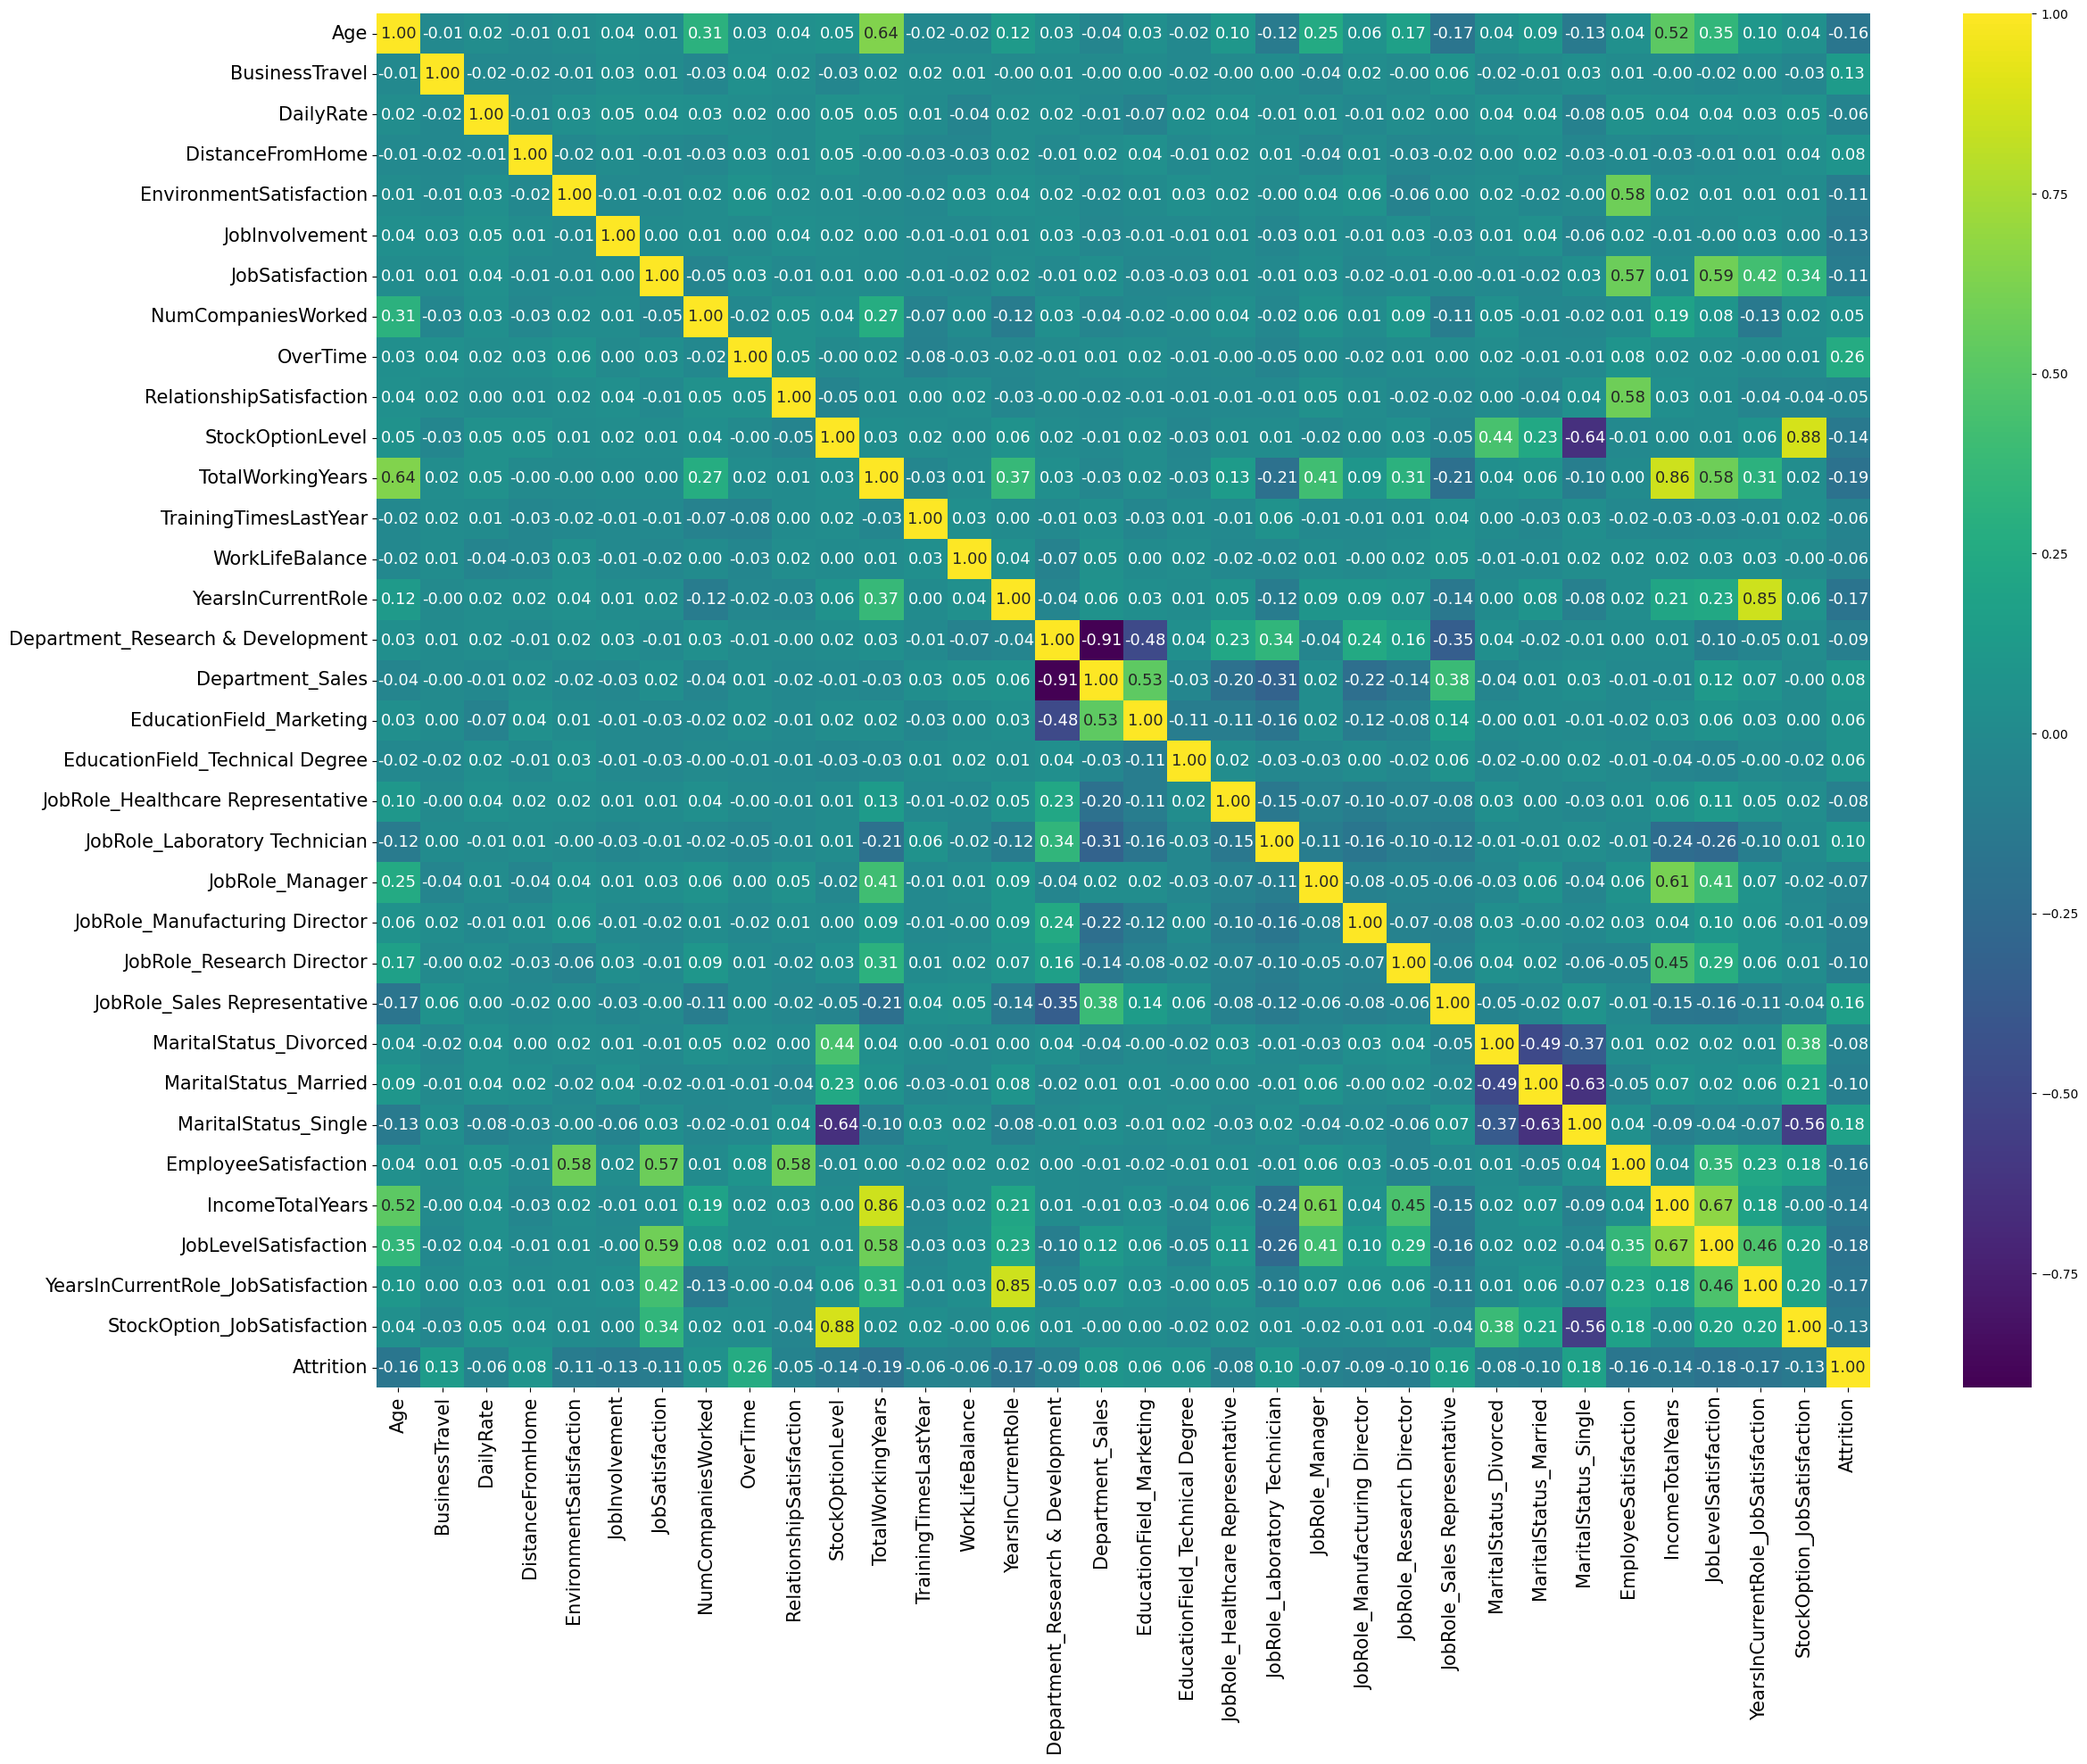

In [22]:

plt.figure(figsize=(27, 20))
sns.heatmap(data_filtered.corr(), cmap='viridis', annot=True, fmt=".2f", annot_kws={"size": 13})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [23]:
df = data_filtered.drop(columns = ['EnvironmentSatisfaction', 'JobSatisfaction',
                                          'RelationshipSatisfaction', 'IncomeTotalYears',
                                          'YearsInCurrentRole_JobSatisfaction', 'StockOption_JobSatisfaction'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1387 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1387 non-null   int64  
 1   BusinessTravel                     1387 non-null   int64  
 2   DailyRate                          1387 non-null   int64  
 3   DistanceFromHome                   1387 non-null   int64  
 4   JobInvolvement                     1387 non-null   int64  
 5   NumCompaniesWorked                 1387 non-null   int64  
 6   OverTime                           1387 non-null   int64  
 7   StockOptionLevel                   1387 non-null   int64  
 8   TotalWorkingYears                  1387 non-null   int64  
 9   TrainingTimesLastYear              1387 non-null   int64  
 10  WorkLifeBalance                    1387 non-null   int64  
 11  YearsInCurrentRole                 1387 non-null   int64  
 1

### 2.7. Standardization

In [25]:

from sklearn.preprocessing import StandardScaler


numerical_new   = ['Age', 'DailyRate', 'DistanceFromHome', 'JobInvolvement', 'NumCompaniesWorked',
                   'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                   'YearsInCurrentRole', 'EmployeeSatisfaction', 'JobLevelSatisfaction']


for num in numerical_new:
    df[num] = StandardScaler().fit_transform(df[num].values.reshape(len(df), 1))

In [26]:
df.describe()

,Age,BusinessTravel,DailyRate,DistanceFromHome,JobInvolvement,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,EmployeeSatisfaction,JobLevelSatisfaction,Attrition
count,1.387000e+03,1387.000000,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1387.000000,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1387.000000
mean,-3.201797e-16,1.086518,-3.073725e-17,-7.684312e-18,-1.511248e-16,1.018171e-16,0.284787,4.098300e-17,-8.452743e-17,1.793006e-17,1.562477e-16,5.122875e-18,-8.708887e-17,-9.733462e-17,0.165105
std,1.000361e+00,0.534265,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,0.451476,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,0.371409
min,-2.066430e+00,0.000000,-1.746955e+00,-1.011249e+00,-2.444483e+00,-1.072199e+00,0.000000,-9.294273e-01,-1.538219e+00,-2.171420e+00,-2.501172e+00,-1.192419e+00,-2.740140e+00,-1.172920e+00,0.000000
25%,-7.082852e-01,1.000000,-8.400474e-01,-8.875735e-01,-1.034126e+00,-6.724300e-01,0.000000,-9.294273e-01,-6.423508e-01,-6.225595e-01,-1.082307e+00,-5.757580e-01,-6.201712e-01,-6.371585e-01,0.000000
50%,-1.423914e-01,1.000000,2.347108e-03,-2.691967e-01,3.762308e-01,-2.726613e-01,0.000000,2.382499e-01,-1.944169e-01,1.518710e-01,3.365585e-01,-2.674274e-01,-9.017893e-02,-3.692777e-01,0.000000
75%,6.498599e-01,1.000000,8.782389e-01,5.965307e-01,3.762308e-01,5.268762e-01,1.000000,2.382499e-01,4.028283e-01,1.518710e-01,3.365585e-01,9.658952e-01,9.698056e-01,7.022456e-01,0.000000
max,2.687077e+00,2.000000,1.716911e+00,2.451661e+00,1.786588e+00,2.525720e+00,1.000000,2.573604e+00,3.538366e+00,2.475162e+00,1.755424e+00,3.432540e+00,2.029790e+00,3.916816e+00,1.000000


After the transformation, the numeric columns have **standard deviation close to 1** and **average close to 0**.

### 2.8. Handle Class Imbalance

In [28]:
x = df[[col for col in df.columns if col not in ['Attrition']]]
y = df['Attrition'].values

print("The number of comparisons between attrition and non-attrition classes before class imbalance :")
print(pd.Series(y).value_counts())

The number of comparisons between attrition and non-attrition classes before class imbalance :
0    1158
1     229
Name: count, dtype: int64


Based on the information above, it is found that the ratio between attrition and non-attrition classes in the `AttritionNum` column is around **1:5**, so the **handle class imbalance** process will be carried out.

In [29]:

from imblearn import over_sampling
x_over, y_over = over_sampling.SMOTE(sampling_strategy = 1).fit_resample(x, y)

print("Number of comparisons between attrition and non-attrition classes after class imbalance :")
print(pd.Series(y_over).value_counts())

Number of comparisons between attrition and non-attrition classes after class imbalance :
1    1158
0    1158
Name: count, dtype: int64


In [33]:
df_final = x_over
df_final['Attrition'] = y_over
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                2316 non-null   float64
 1   BusinessTravel                     2316 non-null   int64  
 2   DailyRate                          2316 non-null   float64
 3   DistanceFromHome                   2316 non-null   float64
 4   JobInvolvement                     2316 non-null   float64
 5   NumCompaniesWorked                 2316 non-null   float64
 6   OverTime                           2316 non-null   int64  
 7   StockOptionLevel                   2316 non-null   float64
 8   TotalWorkingYears                  2316 non-null   float64
 9   TrainingTimesLastYear              2316 non-null   float64
 10  WorkLifeBalance                    2316 non-null   float64
 11  YearsInCurrentRole                 2316 non-null   float

# 3. Modeling

Carry out modeling according to the task determined at the beginning from the data results that have been carried out **preprocessing** and **cleaning** in the previous stage:<br>

A. Split Data Train & Test<br>
B. Modeling (Algorithms implemented are not limited to those taught in class)<br>
C. Model Evaluation: Selection and calculation of **metrics model**<br>
D. Model Evaluation: Is the model best-fit? Avoid **Overfit/Underfit**. Validate with **cross-validation**<br>
E. Hyperparameter Tuning<br>

In the homework report, write down what **experiments** have been carried out and the **method** used, and why you chose and implemented the algorithm.

Explain each result of the **model experiments** that have been carried out, the reasons for using **metrics** in the model, as well as the **hyperparameters** used and their influence on the model.

### 3.1. Split Data

In [34]:

X = df_final.drop(columns=['Attrition'])
y = df_final[['Attrition']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

### 3.2. Modeling

In [35]:
# Import library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


lr = LogisticRegression(random_state = 42)
dt = DecisionTreeClassifier(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
et = ExtraTreesClassifier(random_state = 42)
ada = AdaBoostClassifier(random_state = 42)
gb = GradientBoostingClassifier(random_state = 42)
knn = KNeighborsClassifier()

models = (lr, dt, rf, et, ada, gb, knn)


for model in models:
  model.fit(X_train.values, y_train)

### 3.3. Model Evaluation

The metrics that will be used to measure the level of success of the *machine learning* model are *metric* **recall**. The background for selecting the *metric* **recall** is to avoid high prediction errors of employees who will not leave the company, while in fact the employee chooses to leave (**false negative**) and to rule out errors in predictions of employees who will leave the company. company while in fact the employee did not choose to leave the company (**false positive**). Therefore, the *machine learning* model is selected which has the lowest **false negative** value or the highest **recall** value. <br>

Errors in predicting employees who want to leave (**false positives**) cannot be avoided because if there is a prediction error such that the employee receives special *treatment*, it will not be detrimental to the company and will have the potential to increase employee satisfaction. By increasing employee satisfaction with the company, it is predicted that employee loyalty and dedication will increase so that employees tend to stay longer. <br>

Meanwhile, if there is a prediction error for an employee who remains while the employee chooses to leave (**false negative**) it will have a negative impact on the company, such as a job vacancy, which could potentially reduce the company's performance. Therefore, this type of error is better avoided.

In [36]:
# Import library
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate
import time

def evaluate_models(algoritma):


  result = []


  for model in algoritma:
    start = time.time()
    y_pred_train = model.predict(X_train.values)
    y_pred = model.predict(X_test.values)

    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred)

    score = cross_validate(model, X.values, y, cv=10, scoring='recall', return_train_score=True)
    cv_train = score['train_score'].mean()
    cv_test = score['test_score'].mean()
    end = time.time()


    result.append((recall_train, recall_test, cv_train, cv_test, (end-start)))


  return result

def feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')

In [37]:

result = evaluate_models([lr, dt, rf, et, ada, gb, knn])


df_models = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Extra Trees', 'AdaBoost', 'GradientBoosting', 'KNNeighbors']})
df_result = pd.DataFrame(data = result, columns = ['Recall (Train)', 'Recall (Test)', 'Cross Validation (Train)', 'Cross Validation (Test)', 'Time Elapsed'])
df_recall = df_models.join(df_result)

df_recall.sort_values('Cross Validation (Test)', ascending = False, ignore_index = True, inplace = True)
df_recall

,Model,Recall (Train),Recall (Test),Cross Validation (Train),Cross Validation (Test),Time Elapsed
0,KNNeighbors,0.992565,0.971510,0.994915,0.987054,2.914485
1,Extra Trees,1.000000,0.925926,1.000000,0.925832,3.497710
2,Random Forest,1.000000,0.900285,1.000000,0.916372,8.374345
3,GradientBoosting,0.939281,0.877493,0.932643,0.868073,6.179432
4,AdaBoost,0.907063,0.886040,0.904434,0.861139,8.024341
5,Decision Tree,1.000000,0.863248,1.000000,0.845592,0.451620
6,Logistic Regression,0.819083,0.803419,0.824411,0.815352,0.659174



Based on the **Cross Validation (Test)** results above, the three best models selected for *hyperparameter tuning* are the **KNNeigbors**, **Extra Trees** and **Random Forest** models.

### 3.4. Hyperparameter Tuning

In [38]:
# Import library
from sklearn.model_selection import RandomizedSearchCV


def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, model, hyperparameters, cv=10, scoring_fit='recall'):
    rs = RandomizedSearchCV(estimator=model, param_distributions=hyperparameters, cv=cv, n_jobs=-1, scoring=scoring_fit, verbose=0, random_state=42) # Use GridSearch better if you have more resource & time
    rs.fit(X_train_data, y_train_data)
    best_model = rs.best_estimator_

    y_pred_train = rs.predict(X_train)
    y_pred = rs.predict(X_test)

    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred)

    return [recall_train, recall_test, best_model]


grid_parameters = [

     { # Random Forest
        'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
        'criterion': ['gini','entropy'],
        'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
        'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
        'bootstrap': [True],
        'n_jobs': [-1]
    },
        { # KNearestNeighbor
        'leaf_size': list(range(1,100)),
        'n_neighbors': list(range(1,100)),
        'p': [1,2,3],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
        { # Extra Trees
        'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
        'criterion': ['gini','entropy'],
        'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
        'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
        'bootstrap': [True],
        'n_jobs': [-1]
    }
]

In [ ]:

models_preds_scores = []

for i, model in enumerate([rf, knn, et]):
    hyperparameters = grid_parameters[i]
    result = algorithm_pipeline(X_train, X_test, y_train, y_test,  model, hyperparameters, cv=10)
    models_preds_scores.append(result)

In [ ]:

df_models_tuned = pd.DataFrame({'Model': ['Random Forest', 'KNNeighbors', 'Extra Trees']})
df_tuned = pd.DataFrame(data = models_preds_scores, columns = ['Recall (Train)', 'Recall (Test)', 'Best Model'])
df_tuned = df_models_tuned.join(df_tuned)
df_tuned.iloc[:,:3]


,Model,Recall (Train),Recall (Test)
0,Random Forest,0.998761,0.883191
1,KNNeighbors,0.947955,0.925926
2,Extra Trees,0.997522,0.891738


Based on the *hyperparameter tuning* results above, it was found that the **KNNeighbors model** is the best model because it has the highest **recall** score and the difference in *recall* scores on *train data* and *test data* is not too far , so it can be said to be **best-fit** or *overfitting* does not occur.

### 3.5. Confusion Matrix

In [ ]:

df_tuned['Best Model'].values[1]

KNeighborsClassifier(leaf_size=22, n_neighbors=10)

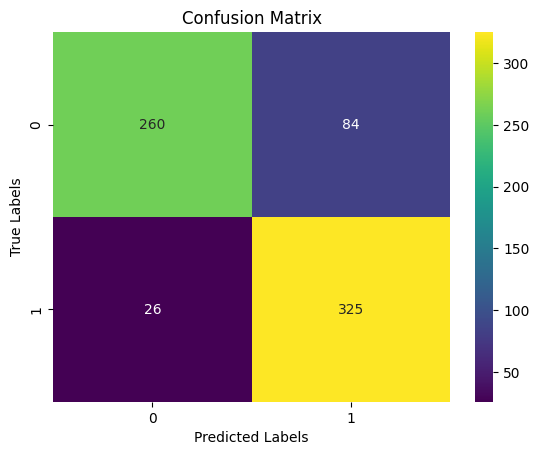

In [ ]:
# Import library
from sklearn.metrics import confusion_matrix


knn = KNeighborsClassifier(leaf_size=22, n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

By using the results of *hyperparameter tuning* for the KNN model, we train the model again to get a **confusion matrix** like the image above, with the results being:

- **True Positive**: Predicted to come out and turned out to be correct 329 times
- **True Negative**: Predicted to last and turned out to be 240 correct
- **False Positive**: Predicted to come out and turned out to be wrong by 104
- **False Negative**: Predicted to hold and turned out to be wrong by 22

# 4. Feature Importance (30 points)
After getting the best model, carry out **interpretation** of the model by looking at its **feature importance**. What causes the model prediction results to be like that.<br>

A. Evaluate the **most important features**.<br>
B. Pull the **business insight**.<br>
C. Provide action items in the form of **recommendations** regarding these insights.<br>

### 4.1. Feature Importance

### 4.2. Business Insights

Some insights that can be obtained based on the **Shap Values** graph on the previous slide are:
1. The ten features that most influence employee attrition rates are `EmployeeSatisfaction`, `StockOptionLevel`, `DistanceFromHome`, `YearsInCurrentRole`, `WorkLifeBalance`, `JobLevelSatisfaction`, `TotalWorkingYears`, `Age`, `MaritaslStatus_Married`, and `DailyRate `.
2. **The lower** an employee's level of satisfaction with the company, the higher the likelihood that the employee will leave the company.
3. **The lower** an employee's compensation in the form of equity, the higher the likelihood that the employee will leave the company.
4. **The further** the distance between an employee and the company, the higher the possibility of the employee leaving the company.
5. **The lower** the number of years an employee has worked in the current position, the higher the likelihood that the employee will leave the company.
6. **The lower** the level of *work life balance* of an employee, the higher the likelihood that the employee will leave the company.
7. **The lower** an employee's level of satisfaction with the level of his or her job position, the higher the likelihood that the employee will leave the company.
8. **The lower** the work experience of an employee, the higher the likelihood that the employee will leave the company.
9. **The lower** the age of an employee, the higher the likelihood that the employee will leave the company.
10. Employees with a married *marital status* have a **lower** attrition rate compared to employees with a marital status other than married.
11. **The higher** the *Daily Rate*, the higher the possibility of employees leaving the company.

### 4.3. Business Recommendations

1. Review the facilities that already exist or will be provided to each employee, such as **salary** and **incentives** to increase *job satisfaction*.
2. Implement **positive culture** as company culture and create activities to increase *engagement* between employees to increase *environment satisfaction* of employees.
3. We recommend that employees be given priority and the opportunity to be involved in **buying shares** of the company.
4. Implement **hybrid working** for employees who have homes far from the office.
5. We recommend providing facilities for employees to carry out **self-development** or **training**, as well as providing **clear career paths** to young or new employees so they can increase their *job level* and the length of time an employee has worked in a particular position.
6. Carry out **workload analysis** for each employee to minimize the number of employees working outside regular working hours (*over time*) by taking into account the number of employees in each department to improve employee *work-life balance* .